In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel(r'C:\Users\LENOVO\Downloads\iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do necessary pre-processing steps.


In [3]:
# Checking shape of the dataset
data.shape

(150, 5)

The dataset contains 150 rows and 5 columns.

In [4]:
# Checking basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Checking for missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 7 missing values in the column 'SL', 6 in the column 'SW' and 6 in the column 'PL'.

# Filling missing values

In [6]:
# Finding overall median value of column 'SL' and also median of 'SL' with respect to the different 'Classification' categories.
data['SL'].median()

5.8

In [7]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

In [8]:
data[data['Classification']=='Iris-setosa']['SL'].median()

5.0

In [9]:
data[data['Classification']=='Iris-versicolor']['SL'].median()

5.85

In [10]:
data[data['Classification']=='Iris-virginica']['SL'].median()

6.5

In [11]:
# Filling missing values in 'SL' with the median value of 'SL' for that particular 'Classification' category.
data.loc[(data['SL'].isna()) & (data['Classification']=='Iris-setosa'),'SL'] = 5.0
data.loc[(data['SL'].isna()) & (data['Classification']=='Iris-versicolor'),'SL'] = 5.85
data.loc[(data['SL'].isna()) & (data['Classification']=='Iris-virginica'),'SL'] = 6.5

In [12]:
data['SL'].isna().sum()

0

In [13]:
# Finding median value of 'SW' for different 'Classification' categories
data[data['Classification']=='Iris-setosa']['SW'].median()

3.4

In [14]:
data[data['Classification']=='Iris-versicolor']['SW'].median()

2.8

In [15]:
data[data['Classification']=='Iris-virginica']['SW'].median()

3.0

In [16]:
# Filling missing values in 'SW' with the median value of 'SW' for that particular 'Classification' category
data.loc[(data['SW'].isna()) & (data['Classification']=='Iris-setosa'),'SW'] = 3.4
data.loc[(data['SW'].isna()) & (data['Classification']=='Iris-versicolor'),'SW'] = 2.8
data.loc[(data['SW'].isna()) & (data['Classification']=='Iris-virginica'),'SW'] = 3.0

In [17]:
data['SW'].isna().sum()

0

In [18]:
# Finding median value of 'PL' corresponding to different 'Classification' categories
data[data['Classification']=='Iris-setosa']['PL'].median()

1.5

In [19]:
data[data['Classification']=='Iris-versicolor']['PL'].median()

4.35

In [20]:
data[data['Classification']=='Iris-virginica']['PL'].median()

5.55

In [21]:
# Filling missing values in 'PL' column with the median of 'PL' with respect to different categories of 'Classification'
data.loc[(data['PL'].isna()) & (data['Classification']=='Iris-setosa'),'PL'] = 1.5
data.loc[(data['PL'].isna()) & (data['Classification']=='Iris-versicolor'),'PL'] = 4.35
data.loc[(data['PL'].isna()) & (data['Classification']=='Iris-virginica'),'PL'] = 5.55

In [22]:
data['PL'].isna().sum()

0

In [23]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [24]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.0,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,5.55,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [25]:
# Checking data type of each column
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Here, the 'Classification' column is of 'object' type. Now we will convert it into numerical form using encoding.

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()
data['Classification'] = lab_en.fit_transform(data['Classification'])

In [27]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.0,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,5.55,2.0,2
148,6.2,3.4,5.40,2.3,2


Here the 'Classification' categories 'iris-setosa', 'iris-versicolor', and 'iris-virginica' are encoded with values '0', '1', and '2' respectively.

# 3. Find out which classification model gives the best result to predict iris species. (Also do random forest algorithm.)

In [28]:
# splitting the dataset into two dataframes
y = data['Classification']
x = data.drop(['Classification'],axis=1)

In [29]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
predictions = log_model.predict(x_test)

In [31]:
# importing accuracy score, f1 score and confusion matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [32]:
print('Accuracy of basic Logistic Regression model is ',accuracy_score(y_test,predictions)*100,'%')
print('Confusion matrix of the model is \n',confusion_matrix(y_test,predictions))
print('f1 score is ',f1_score(y_test,predictions,average='macro'))

Accuracy of basic Logistic Regression model is  100.0 %
Confusion matrix of the model is 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
f1 score is  1.0


# k Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
neighbors = np.arange(3,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions = classifier.predict(x_test)
    acc_value=accuracy_score(y_test,predictions)
    acc.append(acc_value)

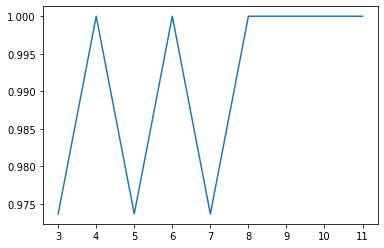

In [34]:
plt.plot(neighbors,acc)

When the number of neighbors are 4,6,8,9,10,11, we have 100% accuracy. So for doing further steps we consider number of nearest neighbors to be 6.

In [35]:
classifier = KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)

In [36]:
print('Accuracy of kNN model is ',accuracy_score(y_test,predictions)*100,'%')
print('Confusion matrix of the model is \n',confusion_matrix(y_test,predictions))
print('f1 score is ',f1_score(y_test,predictions,average='macro'))

Accuracy of kNN model is  100.0 %
Confusion matrix of the model is 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
f1 score is  1.0


# SVM

In [37]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)

In [38]:
print('Accuracy of SVM model is ',accuracy_score(y_test,predictions)*100,'%')
print('Confusion matrix of the model is \n',confusion_matrix(y_test,predictions))
print('f1 score is ',f1_score(y_test,predictions,average='macro'))

Accuracy of SVM model is  100.0 %
Confusion matrix of the model is 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
f1 score is  1.0


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions=dt.predict(x_test)

In [40]:
print('Accuracy of Decision Tree model is ',accuracy_score(y_test,predictions)*100,'%')
print('Confusion matrix of the model is \n',confusion_matrix(y_test,predictions))
print('f1 score is ',f1_score(y_test,predictions,average='macro'))

Accuracy of Decision Tree model is  100.0 %
Confusion matrix of the model is 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
f1 score is  1.0


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predictions=rf.predict(x_test)

In [42]:
print('Accuracy of Random Forest model is ',accuracy_score(y_test,predictions)*100,'%')
print('Confusion matrix of the model is \n',confusion_matrix(y_test,predictions))
print('f1 score is ',f1_score(y_test,predictions,average='macro'))

Accuracy of Random Forest model is  100.0 %
Confusion matrix of the model is 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
f1 score is  1.0


 Since all the classification models gave very high accuracy and f1 score, all of them are very good in predicting iris species.